#OVERVIEW

>Objectives Of The Project

The objective of this project will be to follow the CRISP-DM methodology to answer research questions that give insights to MTN Cote D'Ivore company in quest to expand their infrastructure around the country.
The following are the research questions that were set to be answered:


1. ***Which regions in the country have the most and least service status?***
2. ***What is the average value of the products?***
3. ***Which are the cell numbers of MTN users that are not in service?***

4. ***Which cities in Cote D'Ivore is MTN most used?***
5. ***Which cities is MTN most used during business hours?***






>Project Plan

The following is the list of steps that was decided to be followed throughout the process of answering the research questions and to come up with the required insights into the business requirement:
1. Import the given data into a pandas dataframe
2. View the data and understand its structure and the datatypes contained in it.
3. Perform tasks to clean, merge and integrate the data.
4. Analyze the data using aggregates and basic visualisations.
5. Compile a data story for the client.

>Requirements, Assumptions and Constraints



1. Requirements for this project were: P.C, internet connection and a python IDE
2. Assumptions related to the provided data was that all missing values were equated to zero during data cleaning process
3. Constraints include the fact that the datasets could not be merged into one due to the unique time factor of each data.
4. Small time frame of the data made it hard to perform a time series visualization because the line graphs could not be well scaled for effective visibility.

#Connecting to the database

In [ ]:
%load_ext sql

%sql sqlite://

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


'Connected: @None'

#Importing csv and pandas libraries

In [ ]:
import csv

import pandas as pd

#Importing data from the csv files

In [ ]:
with open('Telcom_dataset.csv','r') as f:
    df1 = pd.read_csv(f, encoding='utf-8') 



with open('Telcom_dataset2.csv','r') as f:
    df2 = pd.read_csv(f, encoding='utf-8') 


with open('Telcom_dataset3.csv','r') as f:
    df3 = pd.read_csv(f, encoding='utf-8') 



#push imported data into new tables within current SQLite Database 

In [ ]:
%sql DROP TABLE if EXISTS df1;
%sql PERSIST df1;

%sql DROP TABLE if EXISTS df2;
%sql PERSIST df2;

%sql DROP TABLE if EXISTS df3;
%sql PERSIST df3;

 * sqlite://
Done.
 * sqlite://
 * sqlite://
Done.
 * sqlite://
 * sqlite://
Done.
 * sqlite://


'Persisted df3'

In [ ]:
%%sql
SELECT * FROM df1 LIMIT 2;

 * sqlite://
Done.


index,PRODUTC,VALUE,DATETIME,CELL_ON_SITE,DW_A_NUMBER_INT,DW_B_NUMBER_INT,COUNTRY_A,COUNTRY_B,CELL_ID,SITE_ID
0,Voice,0,2012-05-06 23:04:37.0,1,49fae048b547780,1a49f8b0ded9de6,19e2e,19e2e,/TJNe+Mmtu,/TJNe+Mmtu
1,sms,0,2012-05-06 23:05:25.0,0,7a54a6eaee19e65,93343ba6e41af95,19e2e,19e2e,/+cKZKIp41,/+cKZKIp41


In [ ]:
%%sql
SELECT * FROM df2 LIMIT 2;

 * sqlite://
Done.


index,PRODUCT,VALUE,DATE_TIME,CELL_ON_SITE,DW_A_NUMBER,DW_B_NUMBER,COUNTRY_A,COUNTRY_B,CELL_ID,SITE_ID
0,sms,0,2012-05-07 23:02:06.0,2,32255675c3b6fe3,1aa7ae01386e9fb,19e2e,19e2e,+854AcBQT2,+854AcBQT2
1,Voice,0,2012-05-07 23:03:44.0,1,ff16d6ac74c1c64,87d87309c15a8c9,19e2e,19e2e,+854AcBQT2,+854AcBQT2


In [ ]:
%%sql
SELECT * FROM df3 LIMIT 2;

 * sqlite://
Done.


index,PRODUCT,VALUE,DATE_TIME,CELL_ON_SITE,DW_A_NUMBER_INT,DW_B_NUMBER_INT,COUNTRY_A,COUNTRY_B,CELLID,SIET_ID
0,Voice,61,2012-05-08 23:01:28.0,2,966f68353622feb,ffd53a3bb2db6f1,19e2e,19e2e,+38u2u/rfx,+38u2u/rfx
1,sms,0,2012-05-08 23:01:31.0,1,a0a597384c612d7,cf3b218f1dde792,19e2e,19e2e,+Fs4mTvdKx,+Fs4mTvdKx


#Cleaning the data

>checking missing values

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PRODUCT       5001 non-null   object
 1   VALUE         5001 non-null   int64 
 2   DATE_TIME     5001 non-null   object
 3   CELL_ON_SITE  5001 non-null   object
 4   DW_A_NUMBER   5001 non-null   object
 5   DW_B_NUMBER   5001 non-null   object
 6   COUNTRY_A     5001 non-null   object
 7   COUNTRY_B     5001 non-null   object
 8   CELL_ID       5001 non-null   object
 9   SITE_ID       4325 non-null   object
dtypes: int64(1), object(9)
memory usage: 390.8+ KB


In [ ]:
df2.count()

PRODUCT         5001
VALUE           5001
DATE_TIME       5001
CELL_ON_SITE    5001
DW_A_NUMBER     5001
DW_B_NUMBER     5001
COUNTRY_A       5001
COUNTRY_B       5001
CELL_ID         5001
SITE_ID         4325
dtype: int64

>Dropping the missing values

In [ ]:
df1 = df1.dropna()

df2 = df2.dropna()

df3 = df3.dropna()

>No missing values

In [ ]:
print(df1.isnull().sum().sum())

print(df2.isnull().sum().sum())

print(df3.isnull().sum().sum())

0
0
0


>Removing duplicates

In [ ]:
df1 = df1.drop_duplicates()
df2 = df2.drop_duplicates()
df3 = df3.drop_duplicates()

>Fixing messy columns

In [ ]:

df1.columns = ['product', 'value', 'date_time', 'cell_on_site', 'dw_a_number_int',
               'dw_b_number_int', 'country_a', 'country_b', 'cell_id', 'site_id']

#df1.head(1)

df2.columns = ['product','value', 'date_time', 'cell_on_site', 'dw_a_number_int',
               'dw_b_number_int', 'country_a', 'country_b', 'cell_id', 'site_id']
df2.head(1)


df3.columns = ['product','value', 'date_time', 'cell_on_site', 'dw_a_number_int',
               'dw_b_number_int', 'country_a', 'country_b', 'cell_id', 'site_id']
#df3.head(1)

In [ ]:
df1.head(2)

,product,value,date_time,dw_a_number_int,dw_b_number_int,cell_id,site_id
0,Voice,0,2012-05-06 23:04:37,49fae048b547780,1a49f8b0ded9de6,/TJNe+Mmtu,/TJNe+Mmtu
1,sms,0,2012-05-06 23:05:25,7a54a6eaee19e65,93343ba6e41af95,/+cKZKIp41,/+cKZKIp41


>Removing the invalid data

In [ ]:
df1.drop(["cell_on_site", "country_a",	"country_b"], axis = 1, inplace = True) 
#df1.head()

df2.drop(["cell_on_site", "country_a",	"country_b"], axis = 1, inplace = True) 
#df2.head()

df3.drop(["cell_on_site", "country_a",	"country_b"], axis = 1, inplace = True) 
df3.head()

,product,value,date_time,dw_a_number_int,dw_b_number_int,cell_id,site_id
0,Voice,61,2012-05-08 23:01:28.0,966f68353622feb,ffd53a3bb2db6f1,+38u2u/rfx,+38u2u/rfx
1,sms,0,2012-05-08 23:01:31.0,a0a597384c612d7,cf3b218f1dde792,+Fs4mTvdKx,+Fs4mTvdKx
2,Voice,10,2012-05-08 23:02:59.0,5441a9a58c97132,52f8b299515b9b7,+ZaaZozy/+,+ZaaZozy/+
3,sms,0,2012-05-08 23:03:04.0,8ab8b9ed6989f61,e09e736e46c5c3d,+cNeJzsTp3,+cNeJzsTp3
4,Voice,22,2012-05-08 23:03:16.0,52662a62b199334,2186273faab4602,/eeMklgyJA,/eeMklgyJA


>Date type conversion

In [ ]:
df1['date_time'] = pd.to_datetime(df1['date_time']) 

df2['date_time'] = pd.to_datetime(df2['date_time']) 

df3['date_time'] = pd.to_datetime(df3['date_time']) 
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4311 entries, 0 to 5000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   product          4311 non-null   object        
 1   value            4311 non-null   int64         
 2   date_time        4311 non-null   datetime64[ns]
 3   dw_a_number_int  4311 non-null   object        
 4   dw_b_number_int  4311 non-null   object        
 5   cell_id          4311 non-null   object        
 6   site_id          4311 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 269.4+ KB


#importing cells geo csv

In [ ]:
with open('cells_geo.csv','r') as f:
    df4 = pd.read_csv(f, index_col=0, encoding='utf-8' ) 

In [ ]:
%sql DROP TABLE if EXISTS df4;
%sql PERSIST df4;

 * sqlite://
Done.
 * sqlite://


'Persisted df4'

In [ ]:
%%sql
SELECT * FROM df4 LIMIT 5;

 * sqlite://
Done.


index,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA,CELL_ID,SITE_CODE
0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000666667,5.368194444,LAGUNE,None,fbb2e75af3,0bb492ef17
1,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000666667,5.368194444,LAGUNE,None,1502501d78,0bb492ef17
2,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000666667,5.368194444,LAGUNE,None,0c2e182a0c,0bb492ef17
3,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488466667,5.158761111,SUD COMOE,None,69bdfc69fd,8a1e6ce31f
4,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488466667,5.158761111,SUD COMOE,None,7a1029d2ab,8a1e6ce31f


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3974 entries, 0 to 3973
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VILLES        3974 non-null   object 
 1   STATUS        3907 non-null   object 
 2   LOCALISATION  3974 non-null   object 
 3   DECOUPZONE    3974 non-null   object 
 4   ZONENAME      3968 non-null   object 
 5   LONGITUDE     3974 non-null   float64
 6   LATITUDE      3974 non-null   float64
 7   REGION        3974 non-null   object 
 8   AREA          3951 non-null   object 
 9   CELL_ID       3974 non-null   object 
 10  SITE_CODE     3974 non-null   object 
dtypes: float64(2), object(9)
memory usage: 372.6+ KB


In [ ]:
df4.columns = ['city', 'status', 'localisation', 
               'geography_zone', 'zone_name', 'longitude', 'latitude',
               'region', 'area', 'cell_id', 'site_code']
df4.head(2)

,city,status,localisation,geography_zone,zone_name,longitude,latitude,region,area,cell_id,site_code
0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,fbb2e75af3,0bb492ef17
1,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,1502501d78,0bb492ef17


#Data Aggregation

> Aggregate values of the value(billing price) column



>Average price for 6, 7 and 8 may 2012 respectively

In [ ]:
df1['value'].mean()


28.33831553973903

In [ ]:
df2['value'].mean()

27.114238798967865

In [ ]:
df3['value'].mean()

26.249130132219904

>Minimum price for 6, 7 and 8 may 2012 respectively

In [ ]:
df1['value'].min()


0

In [ ]:
df2['value'].min()

0

In [ ]:
df3['value'].min()

0

>Maximum price for 6, 7 and 8 may 2012 respectively

In [ ]:
df1['value'].max()

1860

In [ ]:
df2['value'].max()

3380

In [ ]:
df3['value'].max()

6750

>Standard deviation of the billing price for 6, 7 and 8 may 2012 respectively

In [ ]:
df1['value'].std()

82.94595360973247

In [ ]:
df2['value'].std()

102.82703532731918

In [ ]:
df3['value'].std()

139.04298725548014

>Variance of the price for 6, 7 and 8 may 2012 respectively

In [ ]:
df1['value'].var()

6880.03122022789

In [ ]:
df2['value'].var()

10573.399194205747

In [ ]:
df3['value'].var()

19332.95230492761

#Statistical analysis with SQL

>Regions with the most and least service status

In [ ]:
%%sql
SELECT city, geography_zone, zone_name, region
FROM df4
WHERE status = 'in service'
GROUP BY status DESC; 

 * sqlite://
(sqlite3.OperationalError) near "DESC": syntax error
[SQL: SELECT city, geography_zone, zone_name, region
FROM df4
WHERE status = 'in service'
GROUP BY status DESC;]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


In [ ]:
%%sql
SELECT city, geography_zone, zone_name, region
FROM df4
WHERE status =! 'in service'
GROUP BY status DESC; 

 * sqlite://
(sqlite3.OperationalError) unrecognized token: "!"
[SQL: SELECT city, geography_zone, zone_name, region
FROM df4
WHERE status =! 'in service'
GROUP BY status DESC;]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


>Cell numbers of users that are not in service

In [ ]:
%%sql
SELECT dw_a_number_int
FROM df1
INNER JOIN df4 ON df_master.cell_id = df4.cell_id
WHERE status != 'in service'

 * sqlite://
(sqlite3.OperationalError) no such column: df_master.cell_id
[SQL: SELECT dw_a_number_int
FROM df1
INNER JOIN df4 ON df_master.cell_id = df4.cell_id
WHERE status != 'in service']
(Background on this error at: https://sqlalche.me/e/14/e3q8)


>Cities with the most users during business hours

In [ ]:
%%sql
SELECT city 
FROM df4
INNER JOIN df_master ON df4.cell_id = df_master.cell_id
WHERE date_time BETWEEN   AND
GROUP BY city DESC;

 * sqlite://
(sqlite3.OperationalError) near "AND": syntax error
[SQL: SELECT city 
FROM df4
INNER JOIN df_master ON df4.cell_id = df_master.cell_id
WHERE date_time BETWEEN   AND
GROUP BY city DESC;]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


#Data Viz with seaborn

In [ ]:
pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import seaborn as sns

>6th May 2012 product usage and value

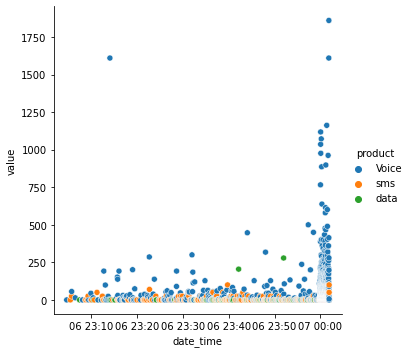

In [ ]:
sns.relplot(data=df1, x="date_time", y="value", hue="product")

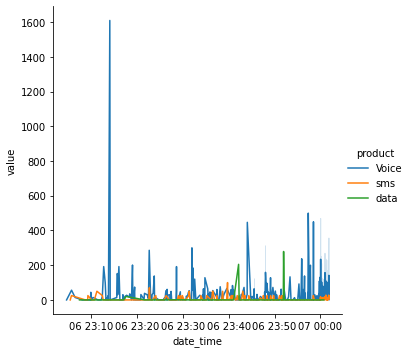

In [ ]:
sns.relplot(data=df1, x="date_time", y="value", hue="product", kind="line")

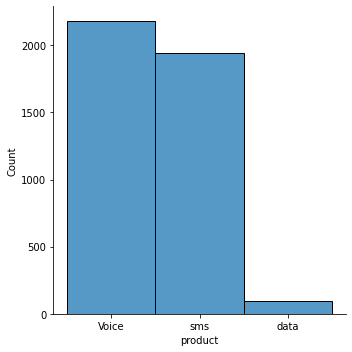

In [ ]:
sns.displot(df1, x="product")

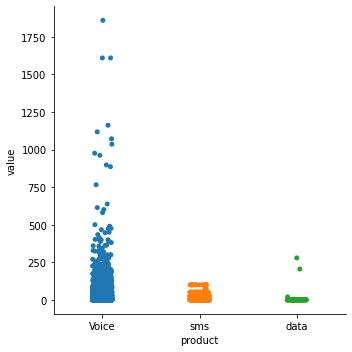

In [ ]:
sns.catplot(data=df1, x="product", y="value")

>7th May 2012 product usage and value

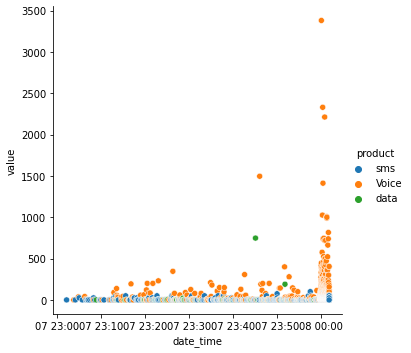

In [ ]:
sns.relplot(data=df2, x="date_time", y="value", hue="product")

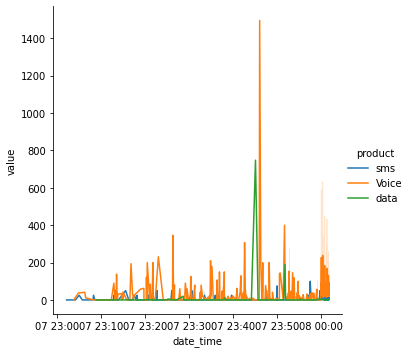

In [ ]:
sns.relplot(data=df2, x="date_time", y="value", hue="product", kind="line")

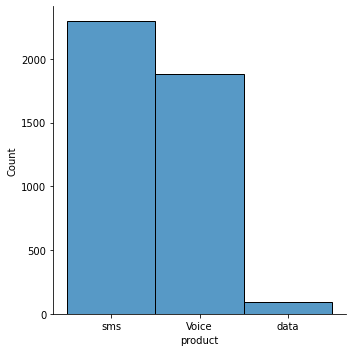

In [ ]:
sns.displot(df2, x="product")

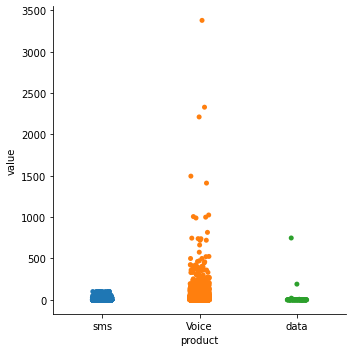

In [ ]:
sns.catplot(data=df2, x="product", y="value")

>8th May 2012 product usage and value

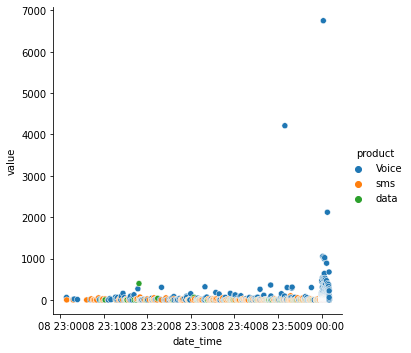

In [ ]:
sns.relplot(data=df3, x="date_time", y="value", hue="product")

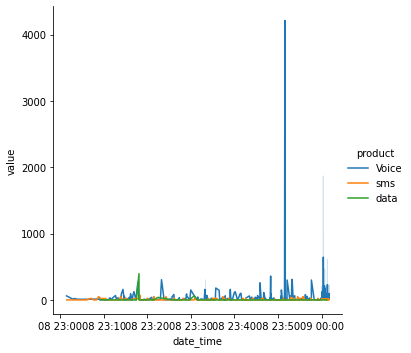

In [ ]:
sns.relplot(data=df3, x="date_time", y="value", hue="product", kind="line")

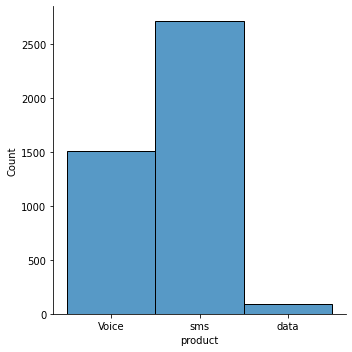

In [ ]:
sns.displot(df3, x="product")

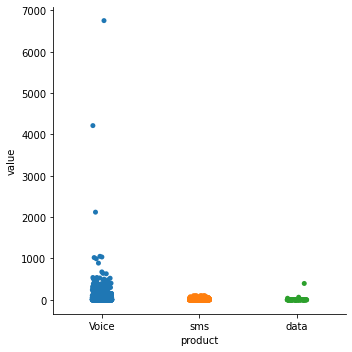

In [ ]:
sns.catplot(data=df3, x="product", y="value")

#Geometry data conversion with pandas and geopandas
>To be used in tableau

In [ ]:
df4.head(1)

,city,status,localisation,geography_zone,zone_name,longitude,latitude,region,area,cell_id,site_code
0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,fbb2e75af3,0bb492ef17


In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 6.7 MB/s 
     |████████████████████████████████| 16.7 MB 423 kB/s 
     |████████████████████████████████| 6.3 MB 7.3 MB/s 


In [ ]:
from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry
import geopandas as gpd # To create GeodataFrame

In [ ]:
# creating a geometry column 
geometry = [Point(xy) for xy in zip(df4['longitude'], df4['latitude'])]

# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}

# Creating a Geographic data frame 
gdf = gpd.GeoDataFrame(df4, crs=crs, geometry=geometry)

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



In [ ]:
gdf.head(2)

,city,status,localisation,geography_zone,zone_name,longitude,latitude,region,area,cell_id,site_code,geometry
0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,fbb2e75af3,0bb492ef17,POINT (-4.00067 5.36819)
1,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,1502501d78,0bb492ef17,POINT (-4.00067 5.36819)


In [ ]:
# converting to CSV file
df4.to_csv("cells_geometry.csv")

# New Section

#OBSERVATIONS



1. Voice products have the highest price and sms have the least
2. SMS and voice products are most widely used
3. Voice products used more after business hours





